In [15]:
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import marsilea as ma
import marsilea.plotter as mp
import scienceplots
# %matplotlib widget
import pickle
plt.style.use(['science', 'nature'])
import numpy as np
from itertools import combinations, product

In [16]:
tool_map = {
    "scapa": "scAPA",
    "scapatrap": "scAPAtrap",
    "sierra": "Sierra",
    "maaper": "MAAPER",
    "scapture": "SCAPTURE",
    "scape": "SCAPE",
    "infernape": "Infernape",
}

protocol_map = {
    "Visium": "10X Visium",
    "VisiumHD": "10X Visium HD",
    "Chromium": "10X Chromium",
    "Dropseq": "Drop-seq",
    "Stereoseq": "Stereo-seq",
    "Slideseq": "Slide-seq V2",
    "SpatialTranscriptomics": "ST",
    "Microwell": "Microwell-seq",
}

protocol_order = ["10X Chromium", "Drop-seq", "Microwell-seq", "10X Visium","Stereo-seq", "Slide-seq V2", "ST"]
tool_order = ["SCAPE", "scAPAtrap", "Infernape", "SCAPTURE", "scAPA",  "Sierra"]

color = [
    "#386b98",
    "#269a51",
    "#edaa4d",
    "#d34123",
    "#7e648a",
    "#454545",
    "#929292",
]

palette=sns.color_palette(color, 7)
mm = 1/25.4

plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 5
plt.rcParams['axes.labelsize'] = 5
plt.rcParams["xtick.top"] = False
plt.rcParams["ytick.right"] = False
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["legend.fontsize"] = 5
plt.rcParams["legend.title_fontsize"] = 6
plt.rcParams['hatch.linewidth'] = 0.5

In [17]:
raw_bam_artifacts_df = pd.read_csv("/root/apabenchmark/data/raw_bam_result/match_performance.tsv", sep="\t")
raw_bam_artifacts_df["protocol"] = raw_bam_artifacts_df["protocol"].map(protocol_map)
raw_bam_artifacts_df["tool"] = raw_bam_artifacts_df["tool"].map(tool_map)
raw_bam_artifacts_df["protocol"] = pd.Categorical(raw_bam_artifacts_df["protocol"], categories=protocol_order)
raw_bam_artifacts_df["tool"] = pd.Categorical(raw_bam_artifacts_df["tool"], categories=tool_order)

In [18]:
junction_match_df = raw_bam_artifacts_df.groupby(["protocol", "tool"]).mean().reset_index().pivot(index=["tool"], columns="protocol", values="junction_match")
asnr_match_df = raw_bam_artifacts_df.groupby(["protocol", "tool"]).mean().reset_index().pivot(index=["tool"], columns="protocol", values="intron_asnr_match")

/tmp/ipykernel_847506/3819097599.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  junction_match_df = raw_bam_artifacts_df.groupby(["protocol", "tool"]).mean().reset_index().pivot(index=["tool"], columns="protocol", values="junction_match")
/tmp/ipykernel_847506/3819097599.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  asnr_match_df = raw_bam_artifacts_df.groupby(["protocol", "tool"]).mean().reset_index().pivot(index=["tool"], columns="protocol", values="intron_asnr_match")


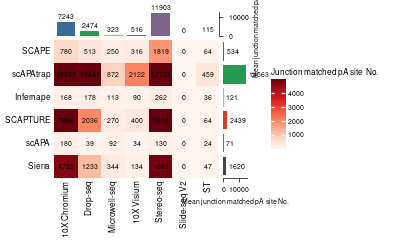

In [19]:
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.minor.bottom"] = True
plt.rcParams["ytick.left"] = False

cmap = ["Reds", "Blues", "Greens"]
h = ma.Heatmap(
    junction_match_df,
    cmap=cmap[0],
    label="Junction matched pA site No.",
    width=42*mm,
    height=35*mm,
    vmax=5000
)
h.add_layer(mp.TextMesh(junction_match_df.to_numpy().astype(int), color="black", fontsize=5))
h.add_right(mp.Numbers(
    junction_match_df.mean(axis=1).to_numpy().astype(int),
    color=palette[0:6][::-1], 
    label="Mean junction matched pA site No.",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm
)
h.add_top(mp.Numbers(
    junction_match_df.mean().astype(int),
    color=palette, 
    label="Mean junction matched pA site No.",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm,
    name="top"
)


# h.add_left(mp.Chunk(["" for i in range(7)], palette, ),pad=0.05)
h.add_left(mp.Labels(tool_order, rotation=0, fontsize=6), size=7*mm, pad=1*mm)
# h.add_bottom(mp.Chunk(["" for i in range(7)], palette),pad=0.05)
h.add_bottom(mp.Labels(protocol_order, rotation=90, fontsize=6), size=10*mm, pad=1*mm)
h.add_legends("right", align_legends="top",pad=2.5*mm)
h.render()

h.get_ax("top").yaxis.set_label_position("right")
h.get_ax("top").yaxis.set_ticks_position("right")
h.get_ax("top").tick_params(axis='y', which='minor', right=False)
h.get_ax("top").spines["right"].set_visible(True)
h.get_ax("top").spines["left"].set_visible(False)


plt.savefig('../../figures/fig5/junction_match.pdf', bbox_inches='tight', dpi=300)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.minor.bottom"] = False

In [20]:
junction_match_df.to_numpy().astype(int)

array([[  780,   513,   250,   316,  1819,     0,    64],
       [29923, 10843,   872,  2122, 57725,     0,   459],
       [  168,   178,   113,    90,   262,     0,    36],
       [ 7686,  2036,   270,   400,  6618,     0,    64],
       [  180,    39,    92,    34,   130,     0,    24],
       [ 4723,  1233,   344,   134,  4862,     0,    47]])

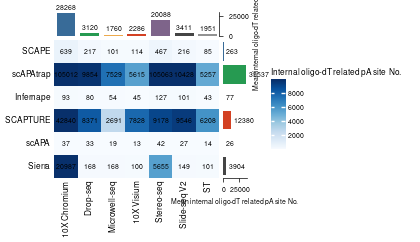

In [21]:
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.minor.bottom"] = True
plt.rcParams["ytick.left"] = False

cmap = ["Reds", "Blues", "Greens"]
h = ma.Heatmap(
    asnr_match_df,
    cmap=cmap[1],
    label="Internal oligo-dT related pA site No.",
    width=42*mm,
    height=35*mm,
    vmax=10000
)
h.add_layer(mp.TextMesh(asnr_match_df.to_numpy().astype(int), color="black", fontsize=5))
h.add_right(mp.Numbers(
    asnr_match_df.mean(axis=1).to_numpy().astype(int),
    color=palette[0:6][::-1], 
    label="Mean internal oligo-dT related pA site No.",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm
)
h.add_top(mp.Numbers(
    asnr_match_df.mean().astype(int),
    color=palette, 
    label="Mean internal oligo-dT relatedd pA site No.",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm,
    name="top"
)


# h.add_left(mp.Chunk(["" for i in range(7)], palette, ),pad=0.05)
h.add_left(mp.Labels(tool_order, rotation=0, fontsize=6), size=7*mm, pad=1*mm)
# h.add_bottom(mp.Chunk(["" for i in range(7)], palette),pad=0.05)
h.add_bottom(mp.Labels(protocol_order, rotation=90, fontsize=6), size=10*mm, pad=1*mm)
h.add_legends("right", align_legends="top",pad=2.5*mm)
h.render()

h.get_ax("top").yaxis.set_label_position("right")
h.get_ax("top").yaxis.set_ticks_position("right")
h.get_ax("top").tick_params(axis='y', which='minor', right=False)
h.get_ax("top").spines["right"].set_visible(True)
h.get_ax("top").spines["left"].set_visible(False)

plt.savefig('../../figures/fig5/asnr_match.pdf', bbox_inches='tight', dpi=300)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.minor.bottom"] = False